# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 602


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"?appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sarmiento
Processing Record 2 of Set 1 | tura
Processing Record 3 of Set 1 | goodyear
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | butembo
Processing Record 6 of Set 1 | cubatao
Processing Record 7 of Set 1 | tobi village
City not found. Skipping...
Processing Record 8 of Set 1 | iqaluit
Processing Record 9 of Set 1 | baker city
Processing Record 10 of Set 1 | putian
Processing Record 11 of Set 1 | chadstone
Processing Record 12 of Set 1 | east london
Processing Record 13 of Set 1 | akrehamn
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | mezzolombardo
Processing Record 17 of Set 1 | dunedin
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | wailua homesteads
Processing Record 20 of Set 1 | la passe
Processing Record 21 of Set 1 | sao joao del rei
Processing Record 22 of Set 1 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sarmiento,-45.5882,-69.0700,15.09,33,0,0.56,AR,1712955609
1,tura,25.5198,90.2201,23.98,35,25,1.56,IN,1712955610
2,goodyear,33.4353,-112.3582,34.54,12,0,5.66,US,1712955610
3,ribeira grande,38.5167,-28.7000,17.22,72,20,8.05,PT,1712955610
4,butembo,0.1500,29.2833,16.25,96,100,0.67,CD,1712955610


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sarmiento,-45.5882,-69.0700,15.09,33,0,0.56,AR,1712955609
1,tura,25.5198,90.2201,23.98,35,25,1.56,IN,1712955610
2,goodyear,33.4353,-112.3582,34.54,12,0,5.66,US,1712955610
3,ribeira grande,38.5167,-28.7000,17.22,72,20,8.05,PT,1712955610
4,butembo,0.1500,29.2833,16.25,96,100,0.67,CD,1712955610


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

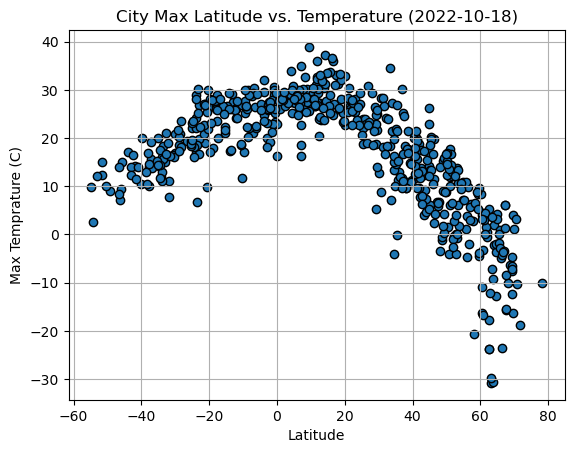

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude, temperature, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.ylabel('Max Temprature (C)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

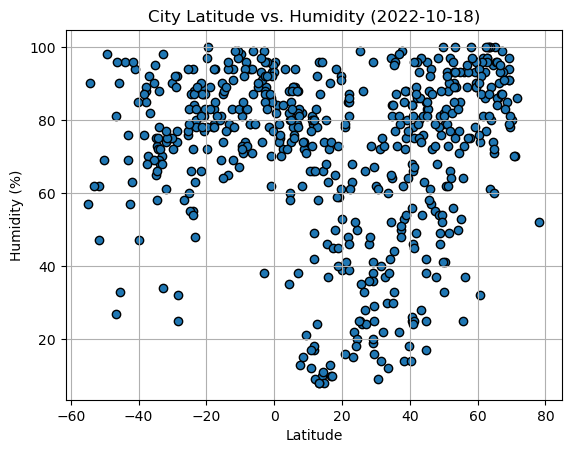

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

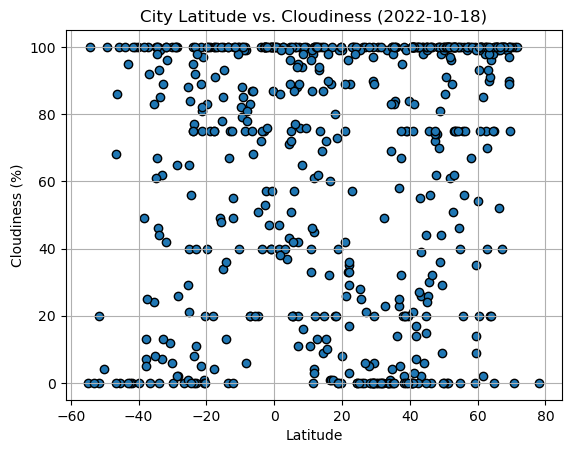

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

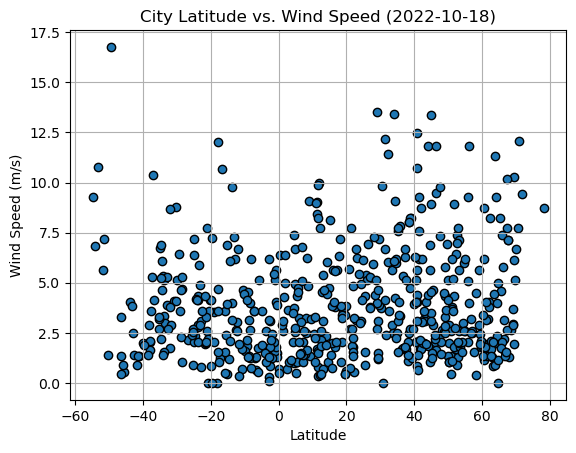

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed, edgecolors='black')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

NameError: name 'x_values' is not defined

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]
northern_hemi_df.index.names = ['City_ID']
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tura,25.5198,90.2201,23.98,35,25,1.56,IN,1712955610
2,goodyear,33.4353,-112.3582,34.54,12,0,5.66,US,1712955610
3,ribeira grande,38.5167,-28.7000,17.22,72,20,8.05,PT,1712955610
4,butembo,0.1500,29.2833,16.25,96,100,0.67,CD,1712955610
6,iqaluit,63.7506,-68.5145,-9.15,61,20,11.32,CA,1712955611


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]
southern_hemi_df.index.names = ['City_ID']
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sarmiento,-45.5882,-69.0700,15.09,33,0,0.56,AR,1712955609
5,cubatao,-23.8950,-46.4253,28.85,55,75,4.12,BR,1712955611
9,chadstone,-37.8877,145.0952,14.04,88,13,2.02,AU,1712955612
10,east london,-33.0153,27.9116,15.71,70,62,3.91,ZA,1712955612
15,dunedin,-45.8742,170.5036,9.33,90,100,0.89,NZ,1712955580


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7286687370863499


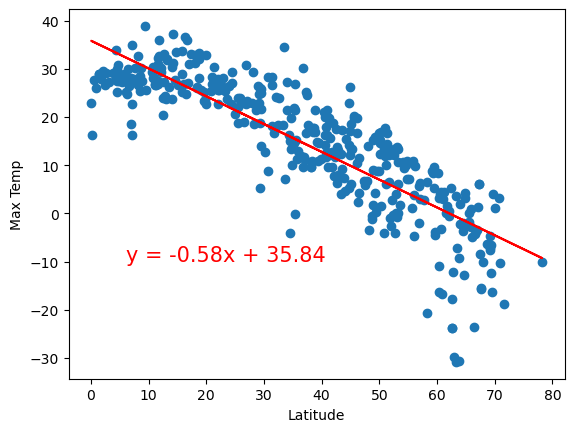

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6, -10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.5740897133677001


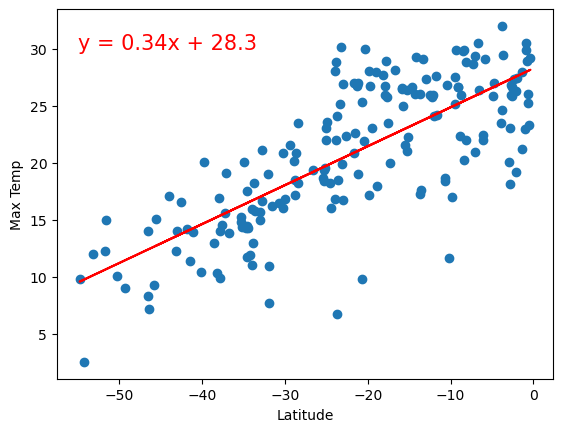

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In Northern Hemispherem, there is a strong correlation considering the r=value being close to 1. As latitude increses means as we move futher away from equator, tempatures decreases which shows a negative linear relationship. In Southern Hemisphere, there is also a strong correlation between these two veriables but less than Northern side. As latitude inreases, temparature also increases which shows a positive linear realtionship.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08924667187933441


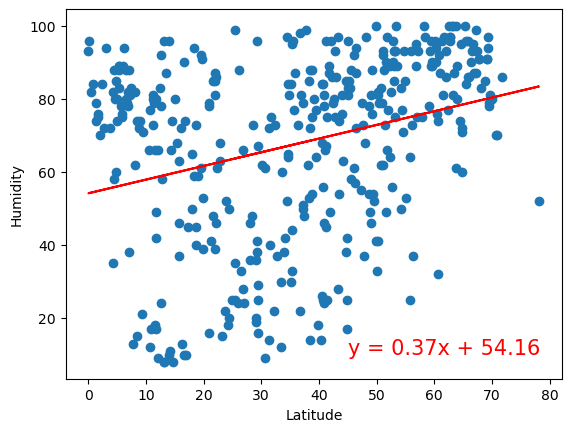

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.10619334997545928


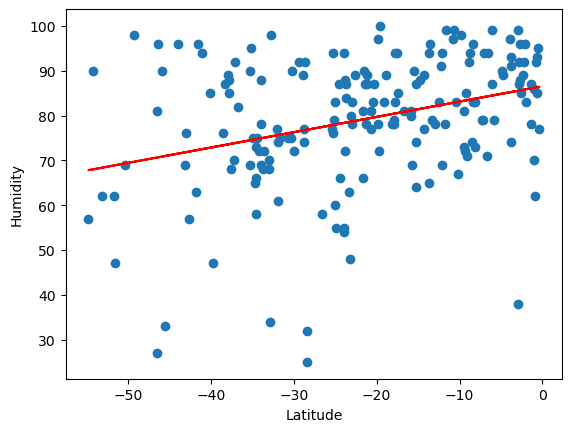

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In Northern Hemispherem, there is no correlation between latitude and humidity considering the r=value being close to 0. In Southern Hemisphere, there is also no correlation between these two veriables

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.022130355175276912


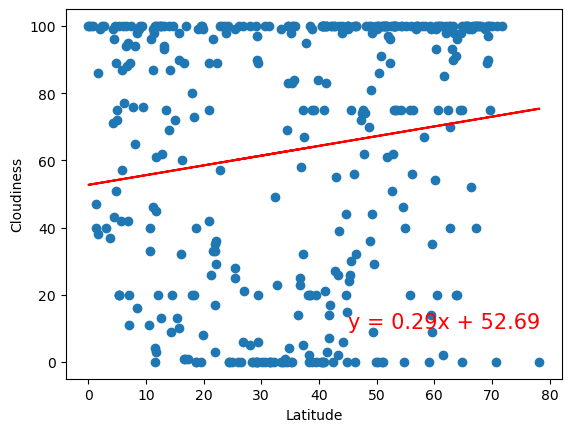

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45, 10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.07089117372884511


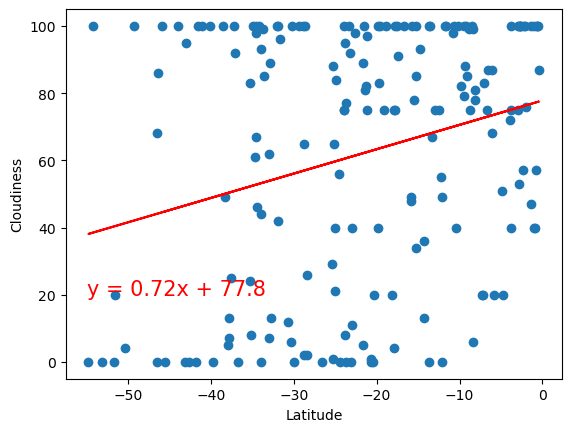

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In Northern Hemispherem, there is no correlation between latitude and cloudiness considering the r=value being close to 0. In Southern Hemisphere, there is also no correlation between these two veriables

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.008630085443876558


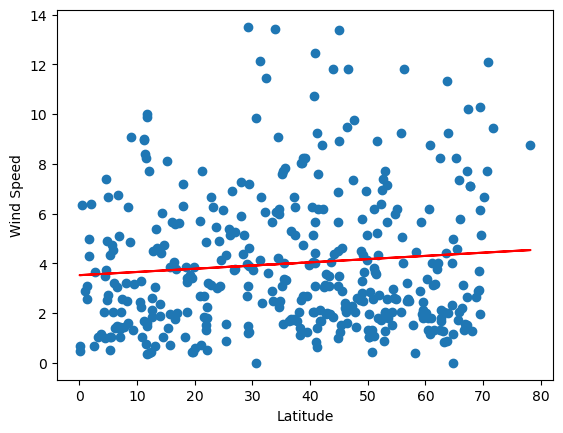

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5, 15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.05662884075453039


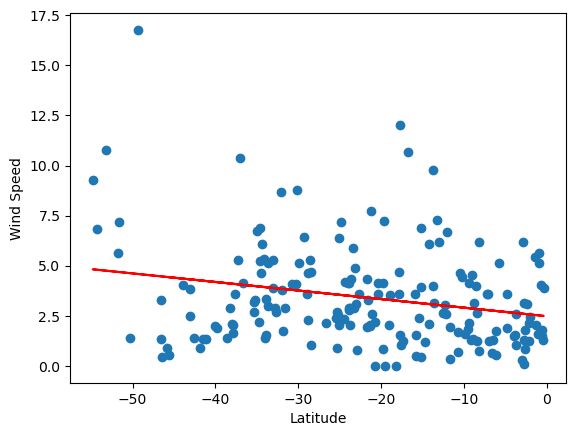

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** In Northern Hemispherem, there is no correlation between latitude and wind speed considering the r=value being close to 0. In Southern Hemisphere, there is also no correlation between these two veriables